In [2]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
parameters = {
  'start':'1',
  'limit':'20',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '33b1696b-7ed1-4bc9-868d-43d8a2c4748d',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)
  

{'status': {'timestamp': '2023-12-12T14:04:16.025Z', 'error_code': 0, 'error_message': None, 'elapsed': 11, 'credit_count': 1, 'notice': None, 'total_count': 8904}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 10616, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'para

In [14]:
type(data)

dict

In [3]:
import pandas as pd

#This allows you to see all the columns, not just like 15
#pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)

In [4]:
#This normalizes the data and makes it all pretty in a dataframe

df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now')
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,...,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10616,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.956780e+07,1.956780e+07,...,51.8309,8.777098e+11,None,2023-12-12T14:03:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-12-12 19:34:23.157471
1,1027,Ethereum,ETH,ethereum,8025,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.202140e+08,1.202140e+08,...,16.9270,2.669980e+11,None,2023-12-12T14:03:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-12-12 19:34:23.157471
2,825,Tether USDt,USDT,tether,67917,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,9.063467e+10,9.360908e+10,...,5.7451,9.359427e+10,None,2023-12-12T14:02:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-12-12 19:34:23.157471
3,1839,BNB,BNB,bnb,1834,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.516964e+08,1.516964e+08,...,2.4356,3.841855e+10,None,2023-12-12T14:02:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-12-12 19:34:23.157471
4,52,XRP,XRP,xrp,1170,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.395746e+10,9.998817e+10,...,2.1298,6.225997e+10,None,2023-12-12T14:03:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-12-12 19:34:23.157471
5,5426,Solana,SOL,solana,559,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.263990e+08,5.647047e+08,...,1.9212,4.014881e+10,None,2023-12-12T14:03:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-12-12 19:34:23.157471
6,3408,USDC,USDC,usd-coin,15477,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,2.417879e+10,2.417879e+10,...,1.5331,2.418233e+10,None,2023-12-12T14:03:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-12-12 19:34:23.157471
7,2010,Cardano,ADA,cardano,998,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",4.500000e+10,3.532767e+10,3.643998e+10,...,1.3356,2.683529e+10,None,2023-12-12T14:02:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-12-12 19:34:23.157471
8,5805,Avalanche,AVAX,avalanche,589,2020-07-13T00:00:00.000Z,"[defi, smart-contracts, three-arrows-capital-p...",7.200000e+08,3.657542e+08,4.337871e+08,...,0.9195,2.856235e+10,None,2023-12-12T14:02:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-12-12 19:34:23.157471
9,74,Dogecoin,DOGE,dogecoin,839,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.422027e+11,1.422027e+11,...,0.8679,1.369548e+10,None,2023-12-12T14:03:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-12-12 19:34:23.157471


In [7]:
#defining a funxn to run for automating :

def api_runner():
    global df
    from requests import Request, Session
    from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
    import json

    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
    parameters = {
      'start':'1',
      'limit':'20',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '33b1696b-7ed1-4bc9-868d-43d8a2c4748d',
    }

    session = Session()
    session.headers.update(headers)

    try:
        
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)
    
    
    
    df = pd.json_normalize(data['data'])
    df['timestamp'] = pd.to_datetime('now')
    df 
    
    #automating into saving as csv file :
    if not os.path.isfile(r"C:\Users\SHIVA\Desktop\A Python Jupyter Tut\Projects\crypto API pull using python\APIcrypto.csv"):
          df.to_csv(r"C:\Users\SHIVA\Desktop\A Python Jupyter Tut\Projects\crypto API pull using python\APIcrypto.csv", header= "column_names")
    
    else:
         df.to_csv(r"C:\Users\SHIVA\Desktop\A Python Jupyter Tut\Projects\crypto API pull using python\APIcrypto.csv", mode ='a', header =False)
                                  
  

In [5]:
import os 
from time import time
from time import sleep

for i in range(333):
    api_runner()
    print("API runner completed")
    sleep(60)#1 min
exit()

NameError: name 'api_runner' is not defined

In [6]:
df2 = pd.read_csv(r"C:\Users\SHIVA\Desktop\A Python Jupyter Tut\Projects\crypto API pull using python\APIcrypto.csv")
df2

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,...,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,10601,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",2.100000e+07,1.956668e+07,...,52.5466,8.825850e+11,NaN,2023-12-11T06:54:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-12-11 12:25:31.765614
1,1,1027,Ethereum,ETH,ethereum,8003,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,1.202156e+08,...,17.2064,2.692228e+11,NaN,2023-12-11T06:54:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-12-11 12:25:31.765614
2,2,825,Tether USDt,USDT,tether,67765,2015-02-25T00:00:00.000Z,"['payments', 'stablecoin', 'asset-backed-stabl...",NaN,9.054544e+10,...,5.7830,9.260748e+10,NaN,2023-12-11T06:53:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-12-11 12:25:31.765614
3,3,1839,BNB,BNB,bnb,1831,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,1.516967e+08,...,2.2504,3.524478e+10,NaN,2023-12-11T06:53:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-12-11 12:25:31.765614
4,4,52,XRP,XRP,xrp,1169,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",1.000000e+11,5.395746e+10,...,2.1389,6.206425e+10,NaN,2023-12-11T06:54:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-12-11 12:25:31.765614
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,15,5994,Shiba Inu,SHIB,shiba-inu,706,2020-08-01T00:00:00.000Z,"['memes', 'ethereum-ecosystem', 'doggone-dogge...",NaN,5.893469e+14,...,0.3631,5.715173e+09,NaN,2023-12-11T07:08:00.000Z,1027.0,Ethereum,ETH,ethereum,0x95ad61b0a150d79219dcf64e1e6cc01f0b64c4ce,2023-12-11 12:39:49.533009
296,16,2,Litecoin,LTC,litecoin,1059,2013-04-28T00:00:00.000Z,"['mineable', 'pow', 'scrypt', 'medium-of-excha...",8.400000e+07,7.396875e+07,...,0.3447,6.166752e+09,NaN,2023-12-11T07:09:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-12-11 12:39:49.533009
297,17,4943,Dai,DAI,multi-collateral-dai,2841,2019-11-22T00:00:00.000Z,"['defi', 'stablecoin', 'asset-backed-stablecoi...",NaN,5.347889e+09,...,0.3399,5.348224e+09,NaN,2023-12-11T07:08:00.000Z,1027.0,Ethereum,ETH,ethereum,0x6b175474e89094c44da98b954eedeac495271d0f,2023-12-11 12:39:49.533009
298,18,1831,Bitcoin Cash,BCH,bitcoin-cash,813,2017-07-23T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'marketplace', ...",2.100000e+07,1.958256e+07,...,0.2912,4.921817e+09,NaN,2023-12-11T07:08:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-12-11 12:39:49.533009


In [7]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)
pd.set_option('display.max_columns', None)
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10616,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19567800.00000,19567800.00000,False,NaN,1,NaN,NaN,None,2023-12-12T14:03:00.000Z,41795.70405,31216357240.31435,9.65530,-0.20045,-0.54638,-0.10347,12.67668,55.81886,59.96471,817849977782.99304,51.83090,877709785128.78003,None,2023-12-12T14:03:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-12-12 19:34:23.157471
1,1027,Ethereum,ETH,ethereum,8025,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120214008.70752,120214008.70752,True,NaN,2,NaN,NaN,None,2023-12-12T14:03:00.000Z,2221.02251,13759438483.88202,3.24350,-0.25397,-0.58869,0.84684,8.33142,43.51581,39.16096,266998019436.58249,16.92700,266998019436.57999,None,2023-12-12T14:03:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-12-12 19:34:23.157471
2,825,Tether USDt,USDT,tether,67917,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,90634673489.60689,93609080552.59227,True,NaN,3,NaN,NaN,None,2023-12-12T14:02:00.000Z,0.99984,58934868494.54857,3.08170,-0.01475,-0.00874,-0.01615,-0.05609,-0.00189,-0.02492,90620331551.67703,5.74510,93594267947.53000,None,2023-12-12T14:02:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-12-12 19:34:23.157471
3,1839,BNB,BNB,bnb,1834,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,151696416.25559,151696416.25559,False,NaN,4,NaN,NaN,None,2023-12-12T14:02:00.000Z,253.25944,1305221609.38892,13.72210,0.55470,3.31215,10.12982,1.85675,22.80600,19.61090,38418549122.23430,2.43560,38418549122.23000,None,2023-12-12T14:02:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-12-12 19:34:23.157471
4,52,XRP,XRP,xrp,1170,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,53957460767.00000,99988170772.00000,False,NaN,5,NaN,NaN,None,2023-12-12T14:03:00.000Z,0.62260,1666778159.56575,-11.95530,0.02417,0.05252,2.17107,-6.10359,28.71494,29.46282,33593899374.99955,2.12980,62259970905.72000,None,2023-12-12T14:03:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-12-12 19:34:23.157471
5,5426,Solana,SOL,solana,559,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,426398984.06398,564704723.05997,True,NaN,6,NaN,NaN,None,2023-12-12T14:03:00.000Z,71.09700,2804400816.46276,-5.69490,0.57547,4.33610,18.21951,20.38937,229.79288,292.21099,30315689294.15882,1.92120,40148812654.44000,None,2023-12-12T14:03:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-12-12 19:34:23.157471
6,3408,USDC,USDC,usd-coin,15477,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,24178788429.93155,24178788429.93155,False,NaN,7,NaN,NaN,None,2023-12-12T14:03:00.000Z,1.00015,7488797958.41197,15.16440,0.00202,0.00415,0.01185,0.02236,-0.02622,0.00536,24182330043.88259,1.53310,24182330043.88000,None,2023-12-12T14:03:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-12-12 19:34:23.157471
7,2010,Cardano,ADA,cardano,998,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",45000000000.00000,35327669681.31500,36439975031.08700,False,NaN,8,NaN,NaN,None,2023-12-12T14:02:00.000Z,0.59634,1314649853.32536,8.16550,0.35514,8.61500,49.56291,55.59042,141.35216,140.32482,21067291956.75911,1.33560,26835286522.04000,None,2023-12-12T14:02:00.000Z,NaN,N

In [8]:
#Groupby

df3 = df.groupby('name', sort = False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
                                
df3
                                 
                                 
                         

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,-0.20045,-0.54638,-0.10347,12.67668,55.81886,59.96471
Ethereum,-0.25397,-0.58869,0.84684,8.33142,43.51581,39.16096
Tether USDt,-0.01475,-0.00874,-0.01615,-0.05609,-0.00189,-0.02492
BNB,0.55470,3.31215,10.12982,1.85675,22.80600,19.61090
XRP,0.02417,0.05252,2.17107,-6.10359,28.71494,29.46282
Solana,0.57547,4.33610,18.21951,20.38937,229.79288,292.21099
USDC,0.00202,0.00415,0.01185,0.02236,-0.02622,0.00536
Cardano,0.35514,8.61500,49.56291,55.59042,141.35216,140.32482
Avalanche,-1.58896,11.02655,81.42343,120.81548,332.62926,329.78324


In [9]:
df4 = df3.stack()
pd.set_option('display.max_rows', None)
df4

name                                      
Bitcoin       quote.USD.percent_change_1h     -0.20045
              quote.USD.percent_change_24h    -0.54638
              quote.USD.percent_change_7d     -0.10347
              quote.USD.percent_change_30d    12.67668
              quote.USD.percent_change_60d    55.81886
              quote.USD.percent_change_90d    59.96471
Ethereum      quote.USD.percent_change_1h     -0.25397
              quote.USD.percent_change_24h    -0.58869
              quote.USD.percent_change_7d      0.84684
              quote.USD.percent_change_30d     8.33142
              quote.USD.percent_change_60d    43.51581
              quote.USD.percent_change_90d    39.16096
Tether USDt   quote.USD.percent_change_1h     -0.01475
              quote.USD.percent_change_24h    -0.00874
              quote.USD.percent_change_7d     -0.01615
              quote.USD.percent_change_30d    -0.05609
              quote.USD.percent_change_60d    -0.00189
              quote.US

In [10]:
type(df3)

pandas.core.frame.DataFrame

In [11]:
type(df4)

pandas.core.series.Series

In [12]:
#converting df4 to dataframe

df5 = df4.to_frame(name = 'values')
df5

values
name                                               
Bitcoin      quote.USD.percent_change_1h   -0.20045
             quote.USD.percent_change_24h  -0.54638
             quote.USD.percent_change_7d   -0.10347
             quote.USD.percent_change_30d  12.67668
             quote.USD.percent_change_60d  55.81886
             quote.USD.percent_change_90d  59.96471
Ethereum     quote.USD.percent_change_1h   -0.25397
             quote.USD.percent_change_24h  -0.58869
             quote.USD.percent_change_7d    0.84684
             quote.USD.percent_change_30d   8.33142
             quote.USD.percent_change_60d  43.51581
             quote.USD.percent_change_90d  39.16096
Tether USDt  quote.USD.percent_change_1h   -0.01475
             quote.USD.percent_change_24h  -0.00874
             quote.USD.percent_change_7d   -0.01615
             quote.USD.percent_change_30d  -0.05609
             quote.USD.percent_change_60d  -0.00189
             quote.USD.percent_change_90d  -0.02492
BNB          quote.USD.percent_change_1h    0.55470
             quote.USD.percent_change_24h   3.31215
             quote.USD.percent_change_7d   10.12982
             quote.USD.percent_change_30d   1.85675
             quote.USD.percent_change_60d  22.80600
             quote.USD.percent_change_90d  19.61090
XRP          quote.USD.percent_change_1h    0.02417
             quote.USD.percent_change_24h   0.05252
             quote.USD.percent_change_7d    2.17107
             quote.USD.percent_change_30d  -6.10359
             quote.USD.percent_change_60d  28.71494
             quote.USD.percent_change_90d  29.46282
Solana       quote.USD.percent_change_1h    0.57547
             quote.USD.percent_change_24h   4.33610
             quote.USD.percent_change_7d   18.21951
             quote.USD.percent_change_30d  20.38937
             quote.USD.percent_change_60d 229.79288
             quote.USD.percent_change_90d 292.21099
USDC         quote.USD.percent_change_1h    0.00202
             quote.USD.percent_change_24h   0.00415
             quote.USD.percent_change_7d    0.01185
             quote.USD.percent_change_30d   0.02236
             quote.USD.percent_change_60d  -0.02622
             quote.USD.percent_change_90d   0.00536
Cardano      quote.USD.percent_change_1h    0.35514
             quote.USD.percent_change_24h   8.61500
             quote.USD.percent_change_7d   49.56291
             quote.USD.percent_change_30d  55.59042
             quote.USD.percent_change_60d 141.35216
             quote.USD.percent_change_90d 140.32482
Avalanche    quote.USD.percent_change_1h   -1.58896
             quote.USD.percent_change_24h  11.02655
             quote.USD.percent_change_7d   81.42343
             quote.USD.percent_change_30d 120.81548
             quote.USD.percent_change_60d 332.62926
             quote.USD.percent_change_90d 329.78324
Dogecoin     quote.USD.percent_change_1h    0.14187
             quote.USD.percent_change_24h  -1.29760
             quote.USD.percent_change_7d    8.29266
             quote.USD.percent_change_30d  22.66031
             quote.USD.percent_change_60d  64.27334
             quote.USD.percent_change_90d  57.66502
TRON         quote.USD.percent_change_1h   -0.05741
             quote.USD.percent_change_24h  -0.30155
             quote.USD.percent_change_7d    1.75318
             quote.USD.percent_change_30d  -3.55421
             quote.USD.percent_change_60d  22.06656
             quote.USD.percent_change_90d  29.23072
Polkadot     quote.USD.percent_change_1h   -0.17754
             quote.USD.percent_change_24h   8.02691
             quote.USD.percent_change_7d   30.50453
             quote.USD.percent_change_30d  25.65112
             quote.USD.percent_change_60d  94.57601
             quote.USD.percent_change_90d  79.36378
Polygon      quote.USD.percent_change_1h    0.76141
             quote.USD.percent_change_24h   3.52441
             quote.USD.percent_change_7d   12.05604
             quote.USD.percent_change_30d

In [13]:
df5.count()

values    120
dtype: int64

In [14]:
index = pd.Index(range(120))

In [15]:
df6 = df5.set_index(index)
df6 = df5.reset_index()
df6

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,-0.20045
1,Bitcoin,quote.USD.percent_change_24h,-0.54638
2,Bitcoin,quote.USD.percent_change_7d,-0.10347
3,Bitcoin,quote.USD.percent_change_30d,12.67668
4,Bitcoin,quote.USD.percent_change_60d,55.81886
5,Bitcoin,quote.USD.percent_change_90d,59.96471
6,Ethereum,quote.USD.percent_change_1h,-0.25397
7,Ethereum,quote.USD.percent_change_24h,-0.58869
8,Ethereum,quote.USD.percent_change_7d,0.84684
9,Ethereum,quote.USD.percent_change_30d,8.33142


In [19]:
df7 = df6.rename(columns = {'level_1' : 'percent_change'})
df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,-0.20045
1,Bitcoin,quote.USD.percent_change_24h,-0.54638
2,Bitcoin,quote.USD.percent_change_7d,-0.10347
3,Bitcoin,quote.USD.percent_change_30d,12.67668
4,Bitcoin,quote.USD.percent_change_60d,55.81886
5,Bitcoin,quote.USD.percent_change_90d,59.96471
6,Ethereum,quote.USD.percent_change_1h,-0.25397
7,Ethereum,quote.USD.percent_change_24h,-0.58869
8,Ethereum,quote.USD.percent_change_7d,0.84684
9,Ethereum,quote.USD.percent_change_30d,8.33142


In [22]:
df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['1h','24h','7d','30d','60d','90d'])
df7

,name,percent_change,values
0,Bitcoin,1h,-0.20045
1,Bitcoin,24h,-0.54638
2,Bitcoin,7d,-0.10347
3,Bitcoin,30d,12.67668
4,Bitcoin,60d,55.81886
5,Bitcoin,90d,59.96471
6,Ethereum,1h,-0.25397
7,Ethereum,24h,-0.58869
8,Ethereum,7d,0.84684
9,Ethereum,30d,8.33142


In [23]:
#visualisation :
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\SHIVA\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\SHIVA\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\SHIVA\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\SHIVA\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

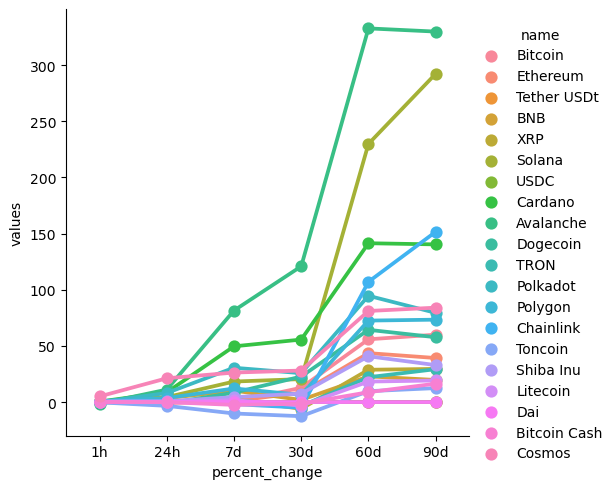

In [24]:
sns.catplot(x='percent_change', y='values', hue='name', data=df7, kind='point')